# Numerical Methods for Partial Differential Equations

## Poisson Equation

The Poisson equation in $2$-dimensions is given by

$$\nabla^2 \phi(x, y) = \rho(x, y), $$

for $(x, y) \in D \subset \mathbb{R}^2$. There are basicaly two kinds of boundary conditions we can specify. The _Dirichlet_ boundary condition is given by $\phi(x, y) = f(x, y)$, for $(x, y) \in \partial D$. The _Von Neumann_ boundary condition is given by $\nabla \phi \cdot \bm n = f(x, y)$, where the normal derivative is taken with respect to a direction that is normal to the boundary $\partial D$. 

### Discretization

Let's discretize the Poisson equation in a $N \times M$ grid. Let 

$$x_i = x_{\text{min}} + (i - 1)n, i = 1, 2, ..., N \\ y_j = y_{\text{min}} + (j - 1)m, j = 1, 2, ..., M$$

where the domain $D = [x_{\text{min}}, x_{\text{max}}] \times [y_{\text{min}}, y_{\text{max}}]$ is rectangular and $n$ and $m$ are the grid spacings in the two directions. If $n, m << 1$, we can use Taylor series to approximate the function values:

$$\phi_{i+1, j} = \phi(x_{i + 1}, y_j) = \phi(x_0 + (i + 1 - 1)n, y_j) = \phi(x_0 + (i - 1)n + n, y_j) = \phi(x_i + n, y_j) \\ = \phi_{i, j} + n\frac{\partial \phi}{\partial x}\Big|_{i, j} 
+ \frac{n^2}{2!}\frac{\partial^2 \phi}{\partial x^2}\Big|_{i, j} + \frac{n^3}{3!}\frac{\partial^3\partial \phi}{\partial x^3}\Big|_{i,j} + O(n^4),$$

$$\phi_{i-1, j} = \phi(x_i - n, x_j) = \phi_{i, j} - n\frac{\partial \phi}{\partial x}\Big|_{i, j} 
+ \frac{n^2}{2!}\frac{\partial^2 \phi}{\partial x^2}\Big|_{i, j} - \frac{n^3}{3!}\frac{\partial^3\partial \phi}{\partial x^3}\Big|_{i,j} + O(n^4).$$

Adding both equations, we have

$$\phi_{i+1, j} + \phi_{i-1, j} = 2\phi_{i, j} + n^2\frac{\partial^2 \phi}{\partial x^2}\Big|_{i, j} + O(n^4).$$

Thus,

$$\frac{\partial^2 \phi}{\partial x^2}\Big|_{i, j} = \frac{1}{n^2}\left(\phi_{i+1, j} + \phi_{i-1, j} - 2\phi_{i, j}\right) + O(n^2).$$

Likewise,

$$\frac{\partial^2 \phi}{\partial y^2}\Big|_{i, j} = \frac{1}{m^2}\left(\phi_{i, j+1} + \phi_{i, j-1} - 2\phi_{i, j}\right) + O(m^2).$$

And therefore, the discretized Poisson equation is given by

$$\frac{\partial^2 \phi}{\partial x^2} + \frac{\partial^2 \phi}{\partial y^2} = \rho(x, y) \\ \Leftrightarrow 
\frac{1}{n^2}\left(\phi_{i+1, j} + \phi_{i-1, j} - 2\phi_{i, j}\right) + \frac{1}{m^2}\left(\phi_{i, j+1} + \phi_{i, j-1} - 2\phi_{i, j}\right) = \rho_{i, j}. \\ \Leftrightarrow
\frac{1}{n^2}(\phi_{i+1, j} + \phi_{i-1, j}) + \frac{1}{m^2}(\phi_{i, j+1} + \phi_{i, j-1}) - 2 \left(\frac{1}{n^2} + \frac{1}{m^2}\right)\phi_{i,j} = \rho_{i, j},$$

for $i = 2, ..., N - 1$, $j = 2, ..., M - 1$. 

At the boundary points, we have that $\phi_{i, j} = f_{i, j}$ (Dirichlet b.c.), where $i \in \{1, N\}, j \in \{1, M\}$. For Von Neumann b.c., we have that

$$\frac{\phi_{i+1,j} - \phi_{i,j}}{n}n_x + \frac{\phi_{i,j+1} - \phi_{i,j}}{m}n_y = f_{i,j},$$

for $i \in \{1, N\}, j \in \{1, M\}$ where $(n_x, n_y)$ is a unit vector that is normal to $(x_i, y_j)$. That is,

$$n_xx_i + n_yy_j = 0 \\ n_x^2 + n_y^2 = 1.$$

Solving the system, we have

$$n_x = \frac{- y_j}{\sqrt{x_i^2 + y_j^2}}, n_y =  \frac{x_i}{\sqrt{x_i^2 + y_j^2}},$$

and thus

$$\frac{\phi_{i+1,j} - \phi_{i,j}}{n}\frac{- y_j}{\sqrt{x_i^2 + y_j^2}} + \frac{\phi_{i,j+1} - \phi_{i,j}}{m}\frac{x_i}{\sqrt{x_i^2 + y_j^2}} = f_{i,j},$$

$$\phi_{ij} = \frac{nm}{my_j - nx_i} \left(\frac{y_j}{n}\phi_{i+1, j} - \frac{x_i}{m}\phi_{i, j+1} + f_{ij}\sqrt{x_i^2 + y_j^2}\right).$$

If we let $k_x = \frac{1}{n^2}, k_y = \frac{1}{m^2}$ and $k_{xy} = 2 \left(\frac{1}{n^2} + \frac{1}{m^2}\right)$, we can write
$$k_x(\phi_{i+1, j} + \phi_{i-1, j}) + k_y(\phi_{i, j+1} + \phi_{i, j-1}) - k_{xy}\phi_{i,j} = \rho_{i, j}.$$

Thus, to solve the equation, we need to solve the linear system of equations for the $N \times M$ unknowns $\phi_{ij}$. Writting

$$\phi_{i,j} = \frac{1}{k_{xy}}\left[k_x(\phi_{i+1, j} + \phi_{i-1, j}) + k_y(\phi_{i, j+1} + \phi_{i, j-1}) - \rho_{ij}\right],$$

we can see that, intuitively, the solution at a point is given by a kind of weighted average of the values at the neighbouring points. If we imagine that we start at the boundary where the solution is known, we can see that we are kind of propagating the boundary profile to the interior by repeatedly averaging the boundary values.

### Solution

The form of the discretized equation suggests that we use a _relaxation method_, such as the Jacobi 

$$\phi^{(r)}_{i,j} = \frac{1}{k_{xy}}\left[k_x(\phi^{(r-1)}_{i+1, j} + \phi^{(r-1)}_{i-1, j}) + k_y(\phi^{(r-1)}_{i, j+1} + \phi^{(r-1)}_{i, j-1}) - \rho_{ij}\right],$$

or the Gauss-Seidel method

$$\phi^{(r)}_{i,j} = \frac{1}{k_{xy}}\left[k_x(\phi^{(r-1)}_{i+1, j} + \phi^{(r)}_{i-1, j}) + k_y(\phi^{(r-1)}_{i, j+1} + \phi^{(r)}_{i, j-1}) - \rho_{ij}\right].$$

The recursive process is terminated when the _maximum relative difference_ between the solution components from two consecutive iterations is below a certain threshold:

$$\max \Big|1 - \frac{\phi^{(r-1)}_{ij}}{\phi^{(r)}_{ij}}\Big| < \epsilon.$$ 

If some of the components are zero, the relative difference is replaced by the absolute difference $|\phi^{(r)}_{ij} - \phi^{(r-1)}_{ij}|$.

### Code and Examples

In [10]:
import math
import warnings

import matplotlib.pyplot as plt
import numpy as np

from typing import Callable, List, Literal


def poisson_equation_2d(
    x: List[float],
    y: List[float],
    rho: Callable[[float, float], float], 
    f: Callable[[float, float], float], 
    bc_type: Literal["dirichlet", "von-neumann"] = "dirichlet",
    n_iter: int = 10000,
    tol: float = 1e-5
) -> List[List[float]]:

    converged = False
    
    N = len(x)
    M = len(y)

    n = x[N - 1] - x[0] / N
    m = y[M - 1] - y[0] / M
    
    kx = 1. / n ** 2
    ky = 1. / m ** 2
    kxy = 2. * (kx + ky)

    _rho = [[0] * M for i in range(N)]
    for i in range(1, N - 1):
        for j in range(1, M - 1):
            _rho[i][j] = rho(x[i], y[j])                       # RHS of the equation for the interior points

    phi = [[0] * M for i in range(N)]

    for _ in range(n_iter):                                    # Iteration loop
        error = 0.                                    
        
        for i in range(1, N - 1):                              # Interior points
            for j in range(1, N - 1):
                phi_ij = kx * (phi[i + 1][j] + phi[i - 1][j])
                phi_ij += ky * (phi[i][j + 1] + phi[i][j - 1])
                phi_ij -= _rho[i][j]
                phi_ij = phi_ij / kxy

                e_ij = 1. - phi[i][j] / phi_ij if phi_ij != 0 else phi_ij - phi[i][j]
                
                if abs(e_ij) > error: error = abs(e_ij)

                phi[i][j] = phi_ij

        if bc_type == "dirichlet":                         # Boundary conditions
            for i in range(N):
                phi[i][0] = f(x[i], y[0])
                phi[i][M - 1] = f(x[i], y[M - 1])
            
            for j in range(M):
                phi[0][j] = f(x[0], y[j])
                phi[N - 1][j] = f(x[N - 1], y[j])
        elif bc_type == "von-neumann":
            for j in range(M - 2):
                phi[0][j] = y[j] * phi[1][j] / n - x[0] * phi[0][j + 1] / m + f(x[0], y[j]) * math.sqrt(x[0] ** 2 + y[j] ** 2)
                phi[0][j] = (n * m / (m * y[j] - n * x[0] + 1e-10)) * phi[0][j] 

                phi[N - 1][j] = (m * y[j] - n * x[N - 2]) * phi[N - 2][j] / (n * m) \
                    + x[N - 2] * phi[N - 2][j + 1] / m \
                    - f(x[N - 2], y[j]) * math.sqrt(x[N - 2]**2 + y[j]**2)
                phi[N - 1][j] = n * phi[N - 1][j] / y[j]
            for i in range(N - 2):
                phi[i][0] = y[0] * phi[i + 1][0] / n - x[i] * phi[i][1] / m + f(x[i], y[0]) * math.sqrt(x[i] ** 2 + y[0] ** 2)
                phi[i][0] = (n * m / (m * y[0] - n * x[i] + 1e-10)) * phi[i][0] 

                phi[i][M - 1] = -(m * y[M - 2] - n * x[i]) * phi[i][M - 2] / (n * m) \
                    + y[M - 2] * phi[i + 1][M - 2] / n \
                    + f(x[i], y[M - 2]) * math.sqrt(x[i] ** 2 + y[M - 2] ** 2)
                phi[i][M - 1] = m * phi[i][M - 1] / x[i]
        else:
            raise ValueError(
                f"Boundary condition type {bc_type} not supported. "
                "Available ones are `dirichlet`, `von-neumann`."
            )
        
        if error < tol:
            converged = True 
            break

    if not converged:
        warnings.warn(
            f"Relaxation method did not converge in the tolerance {tol}."
            " Returning the result of the last iteration."
        )

    return phi    

Equation:

$$\nabla^2 \phi(x, y) = \cos(x + y) - \cos(x - y)$$

in a subset $\mathbb{D} = [-\pi, \pi] \times [-\pi, \pi]$ of the plane $\mathbb{R}^2$. In the boundary, $\phi(x, y) = 0$.

In [16]:
f = lambda x, y: 0.
rho = lambda x, y: math.cos(x + y) - math.cos(x - y)

In [39]:
xmin = -math.pi
xmax = math.pi

ymin = -math.pi
ymax = math.pi

N = 51
M = 51

x = [0] * N
y = [0] * M

n = (xmax - xmin) / N 
m = (ymax - ymin) / M

for i in range(N):
    x[i] = xmin + (i - 1) * n

for j in range(M):
    y[j] = ymin + (j - 1) * m

In [40]:
phi = poisson_equation_2d(x, y, rho, f,)

In [41]:
X, Y = np.meshgrid(x, y)
Z = np.array(phi)

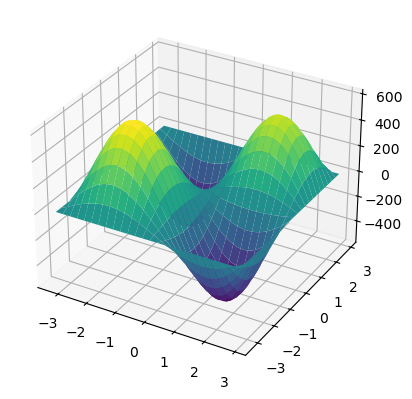

In [42]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, projection="3d")
ax.plot_surface(X, Y, Z, cmap="viridis")
plt.show()